## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime as dt
import time

from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import f1_score, classification_report
from mlxtend.plotting import plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")

## Exploratory data analysis

In [2]:
from google.colab import drive 
drive.mount('/gdrive') 

Mounted at /gdrive


In [3]:
!ls /gdrive/MyDrive/credit_card

creditcard.csv


In [4]:
df = pd.read_csv('/gdrive/MyDrive/credit_card/creditcard.csv')
#df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
#observe the different feature type present in the data
#Checking datatype and Null value presence, although its PCA data so Null values should not exists
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Here we will observe the distribution of our classes

In [5]:
#Checking count of Fraud vs Non-Fraud data present in dataset
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

**We can see a highly class imbalanced data with over ~285K positive transactions and ~500 Fraud transactions**

In [ ]:
# Checking PERCENTAGE of both the classes in the dataset
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

In [ ]:
normal_share, fraud_share

(99.82725143693798, 0.1727485630620034)

**We can see that 99.8% of data is a Normal transaction and only 0.17% of data is a Fraud transaction.**

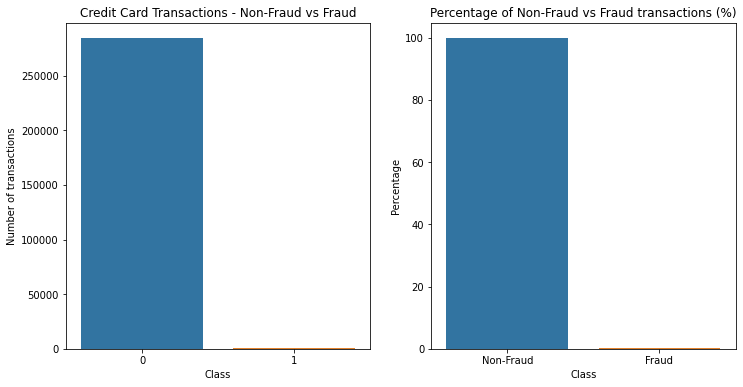

In [ ]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.countplot(df["Class"])
plt.ylabel("Number of transactions")
plt.xlabel("Class")
plt.title("Credit Card Transactions - Non-Fraud vs Fraud")

plt.subplot(1,2,2)
fraud_percentage = {'Class':['Non-Fraud', 'Fraud'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of Non-Fraud vs Fraud transactions (%)')

plt.show()

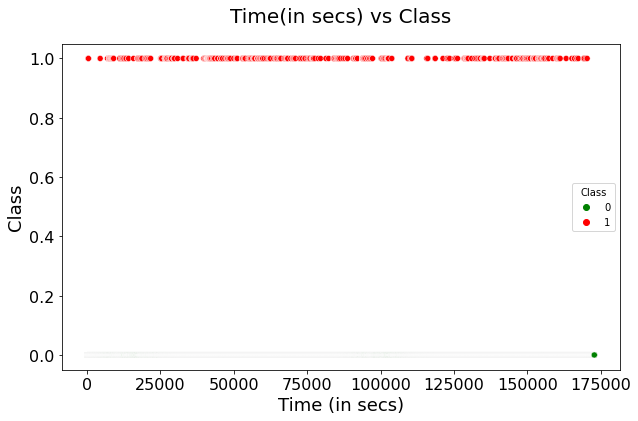

In [ ]:
# Create a scatter plot to observe the distribution of classes with time
fig = plt.figure(figsize=(10,6))

sns.scatterplot(x='Time', y='Class',data=df, hue='Class',palette=['green', 'red'])
plt.xlabel('Time (in secs)', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title("Time(in secs) vs Class", size=20, y=1.05)
plt.show()

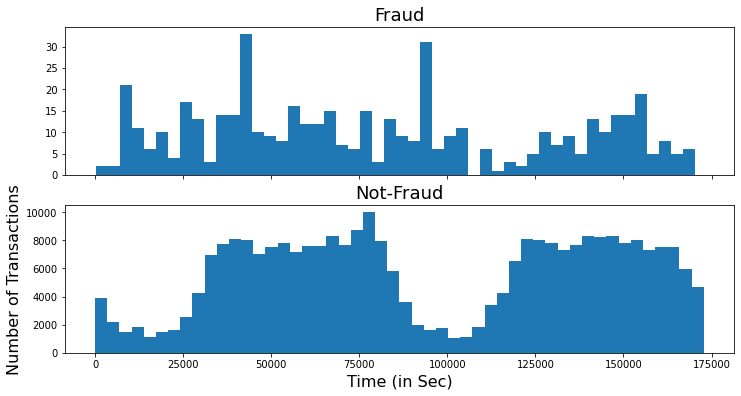

In [ ]:
#Additionaly creating a Histogram for both the classes using same axis - Time, to see distrubution
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud', size=18)

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Not-Fraud', size=18)

plt.xlabel('Time (in Sec)', size=16)
plt.ylabel('Number of Transactions',size=16)
plt.show()

**Observations**<br>
We can't see any pattern in both Time graphs - Both Fraudulent and Non-Fraudulent transactions spans accross the time axis. Time column doesn't provide useful information on FRAUD transaction

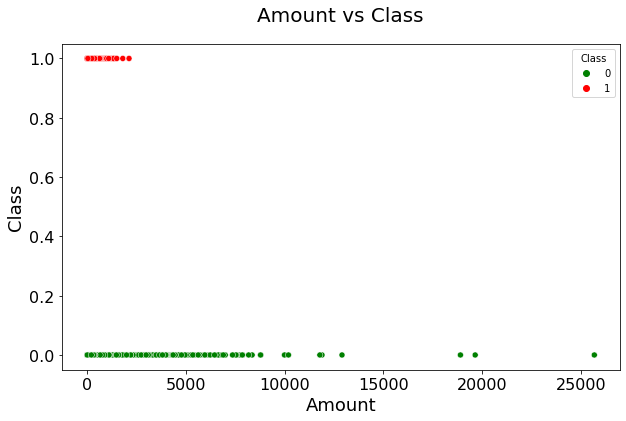

In [ ]:
# Create a scatter plot to observe the distribution of classes with Amount
fig = plt.figure(figsize=(10,6))

sns.scatterplot(x='Amount', y='Class',data=df, hue='Class',palette=['green', 'red'])
plt.xlabel('Amount', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title("Amount vs Class", size=20, y=1.05)
plt.show()

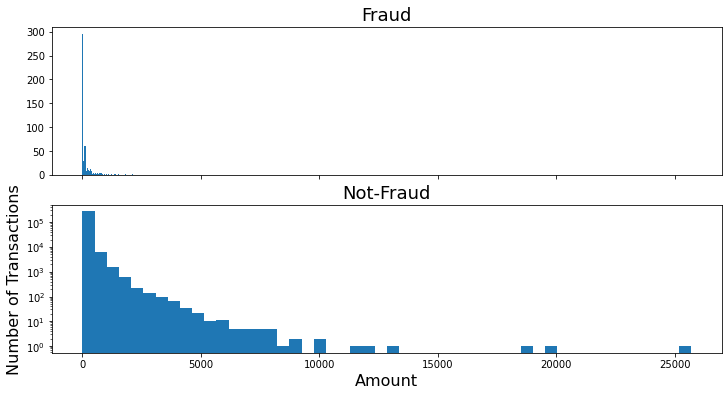

In [ ]:
#Additionaly creating a Histogram for both the classes using same axis- Amount, to see distrubution
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))

bins = 50

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud', size=18)

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Not-Fraud', size=18)

plt.xlabel('Amount', size=16)
plt.ylabel('Number of Transactions',size=16)
plt.yscale('log')
plt.show()

**Observations**<br>
We can see an observable pattern in both the Amount graphs - Clearly LOW amount transactions are more likely to be Fraudulent than high amount transaction.

In [6]:
# Drop unnecessary columns
# We have see that 'Time'column doesnt provide insights about both the Classes, so dropping this variable
df.drop('Time', axis = 1, inplace= True)


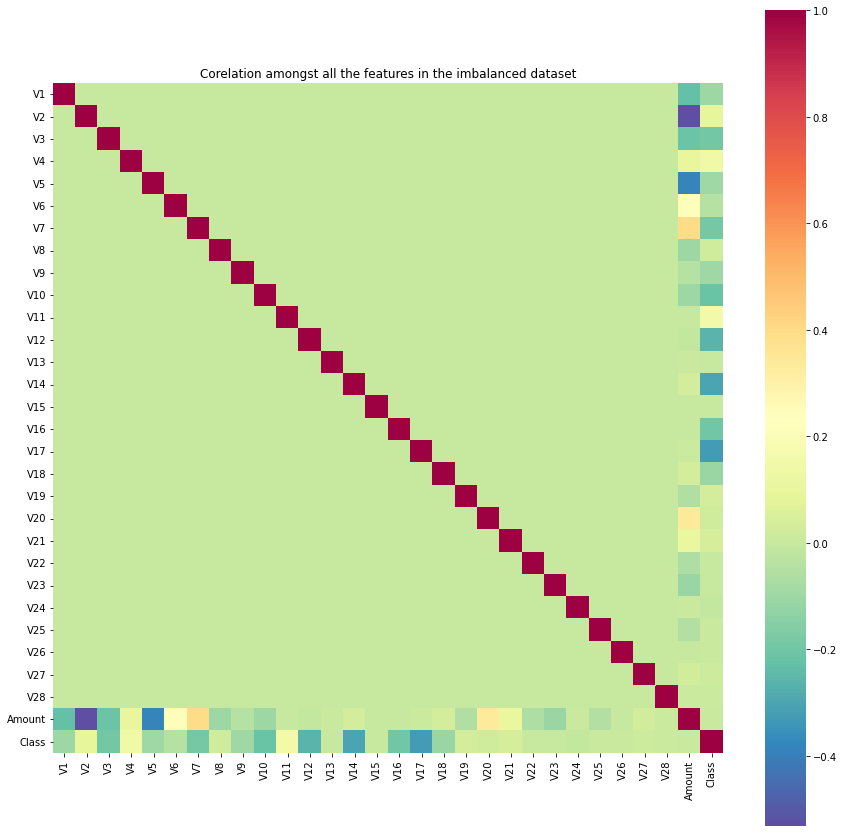

In [ ]:
#Get Corelation Matrix between all the features present in the data
cor_matr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor_matr,square='True',cmap='Spectral_r')
plt.title('Corelation amongst all the features in the imbalanced dataset')
plt.show()

### Splitting the data into train & test data

In [7]:
# Splitting into X & y
y= df["Class"]
X = df.drop("Class", axis = 1)

In [8]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [9]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


### Feature Scaling - 'Amount' column

In [10]:
# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field
scaler = StandardScaler()

# Scaling the TRAIN data
X_train[['Amount']] = scaler.fit_transform(X_train[['Amount']])

# Transforming the TEST data
X_test[['Amount']] = scaler.transform(X_test[['Amount']])

In [ ]:
#Checking X_Train data 
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
223361,143352.0,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,-0.030441,0.624996,1.691496,1.255790,-0.253266,-0.331695,0.307252,-0.930844,0.651666,0.167987,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,-0.307889
165061,117173.0,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,0.611115,-1.945070,-0.726597,1.060888,-1.193347,0.631053,-0.160123,-1.630444,2.106866,-1.692780,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,-0.167026
238186,149565.0,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,-0.638222,0.521931,-0.072768,-1.008237,-0.640249,-0.801946,0.678131,0.044374,0.521919,0.198772,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,-0.300043
150562,93670.0,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,0.560595,-0.855437,-4.179628,0.286872,1.271254,-1.011647,1.458600,-0.613260,0.814931,-2.147124,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,0.113600
138452,82655.0,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,1.221746,0.472626,1.595929,0.777603,0.187685,-1.060579,0.143332,0.007803,-0.055817,0.712695,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,-0.246029


In [ ]:
#Checking X_Test data 
X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,5.299236,-10.834006,1.671120,-9.373859,0.360806,-9.899247,-19.236292,-8.398552,3.101735,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,1.081514
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,-0.087670,0.979427,0.076883,-0.217884,-0.136830,-2.142892,0.126956,1.752662,0.432546,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,1.693173
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,0.543827,0.112453,1.075384,-0.245772,0.180483,1.769860,-0.533172,-0.533300,1.192245,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,-0.225474
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,-1.328335,0.223621,1.132627,-0.550875,0.616568,0.497974,0.502195,0.981343,0.101264,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,-0.341192
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,0.942162,0.850038,-0.616166,0.592634,-0.603845,0.091077,-0.471867,-0.333816,0.404711,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,-0.343585


### Plotting the distribution of a variable

In [11]:
col_names = X_train.columns

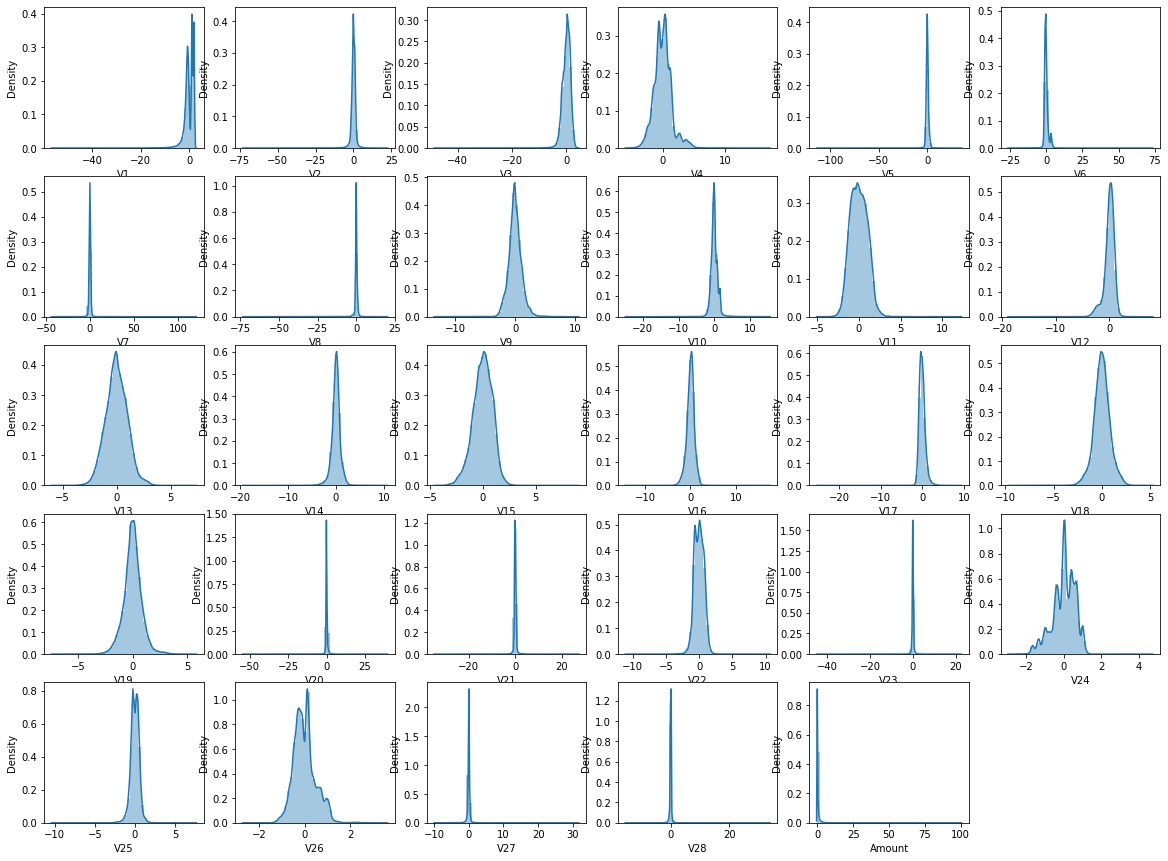

In [ ]:
# plot the histogram of a variable from the dataset to see the skewness

plt.figure(figsize=(20,15))
i=0
for col in col_names:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(X_train[col])

plt.show()

Many features are highly skewed. We will check the skewness using **skew()** and if the skewness is beyond -1 to 1.

In [ ]:
# Lets check the skewness of the features
skew_list = []
for i in col_names:
    skew_list.append(X_train[i].skew())

tmp = pd.concat([pd.DataFrame(col_names, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp.T  #using Transpose for better view

Features,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Skewness,-3.320269,-4.826847,-2.219375,0.677776,-2.928646,1.977725,3.74462,-8.445014,0.543603,1.212102,0.359527,-2.281334,0.067612,-1.992812,-0.308053,-1.113875,-3.975821,-0.266115,0.107289,-1.977859,3.656863,-0.230008,-6.285467,-0.552668,-0.417168,0.579265,-0.03833,11.776522,18.352356


### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [ ]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
pt = PowerTransformer()
pt.fit(X_train)                       ## Fit the PT on training data
X_train_pt = pt.transform(X_train)    ## Then apply on all data
X_test_pt = pt.transform(X_test)


In [ ]:
#Create Dataframe to store Power transformed dataset
X_train_pt_df = pd.DataFrame(data=X_train_pt, columns=col_names)
X_test_pt_df = pd.DataFrame(data=X_test_pt, columns=col_names)

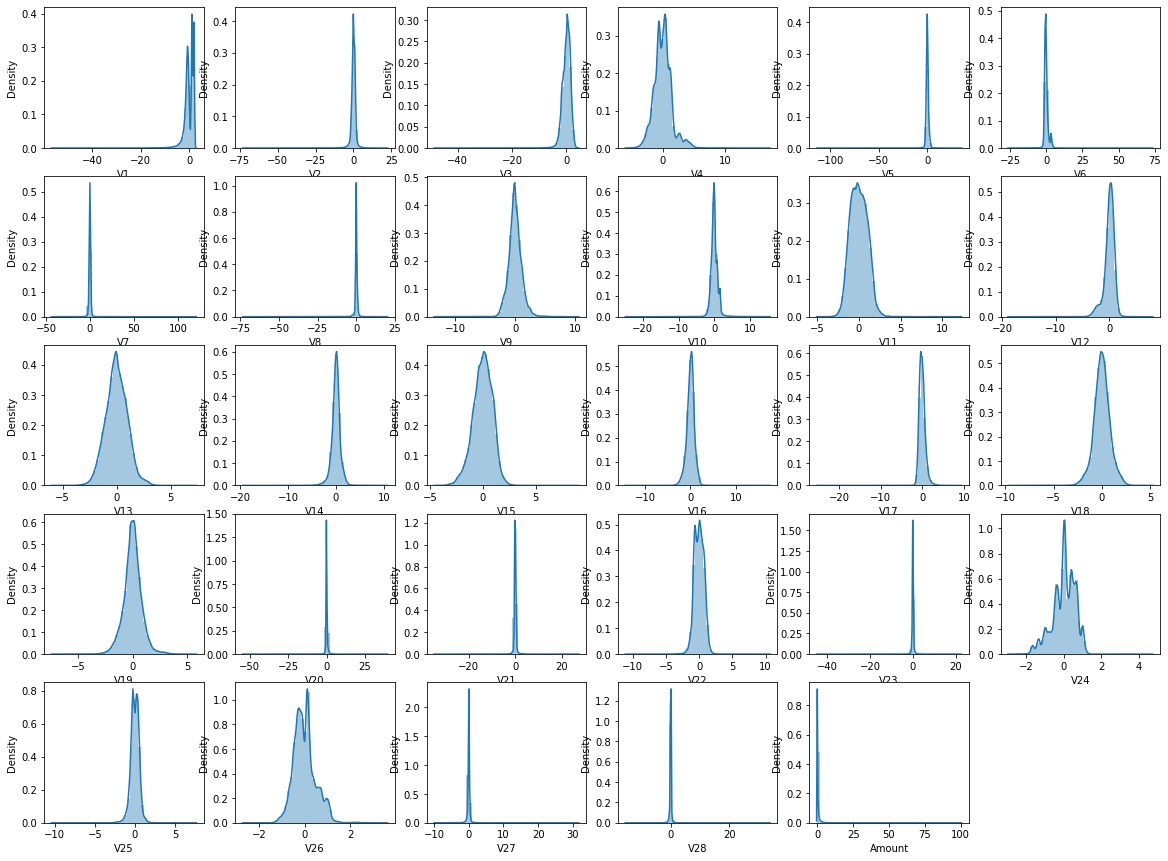

In [ ]:
# plot the histogram of a variable from the dataset again to see the result 

plt.figure(figsize=(20,15))
i=0
for col in col_names:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(X_train[col])

plt.show()

## Model Building
- Build different models on the imbalanced dataset and see the result

**Metric selection on imbalance data**
We are going to use ROC-AUC score as the evaluation metric for the model evaluation purpose. As the data is highly imbalanced and we have only 0.17% fraud cases in the whole data, **Accuracy** is NOT the right metric to evaluate the model.

### Creating Generic model functions 

#### Confusion Matrix Plotting Function

**Confusion Matrix** is a tool which helps us to evaluate the performance of our classification model on unseen data. It's a very important tool to evaluate metrics such as Precision, Recall, Accuracy and Area under the ROC curve using these four values - False Positives (FP), False Negatives (FN), True Positives (TP) and True Negatives (TN).<br>

**Recall** tells us that out of the total number of actual/correctly classified classes how many did our model predicted to belong to the correctly classified class.<br>

**Precision** tells us that out of the total number of predictions how many of them are actually predicted to be true<br>

Let us understand these four metrics in a bit more detail with regards to the given problem.

True Positives (TP): Here the model has predicted the transaction to be fraudulent and in real life the transaction is fraudulent.

True Negatives (TN): Here the model has predicted a transaction to be a non-fraudulent one and in real life the transaction is non-fraudulent.

False Positives (FP): Here the model has predicted the transactions to be fraudulent whereas in real life the given transaction is not fraudulent. These are also known as Type 1 errors.

False Negatives (FN): Here the model has predicted the transactions to be non-fraudulent where as in real life the transactions are fraudulent. These are also known as Type 2 errors

In [ ]:
# # This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    from mlxtend.plotting import plot_confusion_matrix
    
    conf_matrix = metrics.confusion_matrix(y_true=test_y, y_pred=predict_y)
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')
            
    plt.xlabel('Predictions', fontsize=10)
    plt.ylabel('Actuals', fontsize=10)
    plt.title('Confusion Matrix', fontsize=10)
    plt.show()

#### Function to plot the ROC-AUC Curve

ROC curve stands for Receiver operating characteristic curve. In machine learning, ROC curves helps us evaluate our models performance at various threshold settings. ROC curves is a probability curve and AUC stands for the area under the ROC curve. Generally a ROC-AUC curves gives us an idea about how well our model is capable of distinguishing between various class labels. IN ROC-AUC curve, the value of the true positive rates and false positive rates are plotted against each other at various threshold settings. Higher the value of an ROC-AUC curve, the better will be our model in predicting a class 0 label as class 0 and class 1 label as class 1. For this case study, class 1 signifies a fraudulent transaction and class 0 signifies a non-fraudulent transaction.

While plotting the ROC-AUC curve, the TPR is taken in Y-Axis and the FPR is taken at X-axis. TPR is also known ans Recall. Mathematically TPR is defined as (TP/TP+FN), and FPR is defined as (FP/TN+FP). We will have to optimize our Machine Learning models such that they maximize the ROC-AUC score.

In [ ]:
def plot_roc_curve(classifier, X_train, y_train, X_test, y_test):
    from sklearn.metrics import roc_curve, auc
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    '''TRAIN DATA ROC CURVE'''
    #Use probability scores to compute the ROC Curve
    class_probabilities = classifier.predict_proba(X_train)
    y_probs = class_probabilities[:,1]
    fpr["Train"], tpr["Train"], threshold = roc_curve(y_train, y_probs)
    roc_auc["Train"] = auc(fpr["Train"], tpr["Train"])
    
    '''TEST DATA ROC CURVE'''
    #Use probability scores to compute the ROC Curve
    class_probabilities = classifier.predict_proba(X_test)
    y_probs = class_probabilities[:,1]
    fpr["Test"], tpr["Test"], threshold = roc_curve(y_test, y_probs)
    roc_auc["Test"] = auc(fpr["Test"], tpr["Test"])


    plt.figure(figsize=(6,4))
    linewidth = 2
    plt.plot(fpr["Test"], tpr["Test"], color='green', lw=linewidth, label='ROC curve Test Data (area = %0.2f)' % roc_auc["Test"])
    plt.plot(fpr["Train"], tpr["Train"], color='red', lw=linewidth, label='ROC curve Train Data (area = %0.2f)' % roc_auc["Train"])
    plt.plot([0, 1], [0, 1], color='navy', lw=linewidth, linestyle='--', label='Baseline ROC curve (area = 0.5)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

#### Function to run any model and print the classification metrics

This function is used to evaluate our model on unseen data. We will first obtain the best estimator using either grid search or random search. We will use the best estimator from our model to print the roc-auc scores, the accuracy scores, the recall score and the f1 score. F1 score as we know is the harmonic mean between precision and recall scores. We will also use this function to generate the classification report for each of our models.

In [ ]:
def model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels):
    
    #To store results at various phases during training as well as cross validation stages
    results = dict()
    model = rsearch_cv.best_estimator_
    
    #Time at which model starts training 
    train_start_time = dt.now()
    print('Training the model...')
    model.fit(X_train, y_train)
    print('Training completed... \n \n')
    train_end_time = dt.now()
    results['Training_Time'] =  train_end_time - train_start_time
    print('Training Time (HH:MM:SS.ms) -- {}\n\n'.format(results['Training_Time']))
    
    
    #Predict the test data
    print('Predicting test data...')
    test_start_time = dt.now()
    y_pred = model.predict(X_test)
    test_end_time = dt.now()
    print('Predicting test data completed... \n \n')
    results['Testing_Time'] = test_end_time - test_start_time
    print('Testing Time(HH:MM:SS:ms) -- {}\n\n'.format(results['Testing_Time']))
    results['Predicted'] = y_pred
   

    #Compute the F1 score 
    f1_score = metrics.f1_score(y_true=y_test, y_pred=y_pred, average='micro') #F1 = 2 * (precision * recall) / (precision + recall)
    
    #Store F1 Score in results
    results['F1_Score'] = f1_score
    print('---------------------')
    print('|      F1 Score      |')
    print('---------------------')
    print('\n    {}\n\n'.format(f1_score))      
    

    #Calculate overall accuracy of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
        
    #Store the accuracy in results
    results['Accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))

    conf_mat = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)
    print('------------------------------')
    print('|      Confusion Matrix      |')
    print('------------------------------')
    print('\n    {}\n\n'.format(conf_mat)) 

    
    #Calculate overall recall_score of the model
    recall = metrics.recall_score(y_true=y_test, y_pred=y_pred)
        
    #Store the accuracy in results
    results['Recall'] = recall
    print('---------------------')
    print('|      Recall        |')
    print('---------------------')
    print('\n    {}\n\n'.format(recall))

    #Precision Matrix
    precision = metrics.precision_score(y_true=y_test, y_pred=y_pred)
    results['Precision'] = precision
    print('----------------------')
    print('|      Precision     |')
    print('----------------------')
    print('\n    {}\n\n'.format(precision)) 

    #Calculate overall roc-auc of the model
    #Calibrate the model
    sig_clf = CalibratedClassifierCV(model, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    class_probabilities = sig_clf.predict_proba(X_test)
    y_probs = class_probabilities[:,1]
    roc_auc = metrics.roc_auc_score(y_true=y_test, y_score=y_probs)
        
    #Store the ROC-AUC in results
    results['ROC-AUC'] = roc_auc
    print('---------------------')
    print('|      ROC AUC       |')
    print('---------------------')
    print('\n    {}\n\n'.format(roc_auc))   
                   
    #Display the classification report having individual class recalls and precision values.
    print('-------------------------')
    print('| Classifiction Report  |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    
    #Store report in results
    results['Classification_Report'] = classification_report
    print(classification_report)
    
    #Add the trained  model to the results
    results['Model'] = model
    
    print('Confusion Matrix plotting')
    #plot the confusion matrix curve
    plot_confusion_matrix(y_test, y_pred)
    
    return results, model

#### Function to print grid/random search results/attributes

This function will be used to print the best estimator obtained using grid search/random search. For each estimator, we will print the best parameters for a given function along with their best scores on the cross validation dataset.

In [ ]:
def print_grid_search_attributes(model):
    #Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))

    #Parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))

    #Number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal number of cross validation sets: {}\n'.format(model.n_splits_))

    #Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validated scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

### ML Models

In [11]:
#Defining random state value
state=42

#Create a dataframe to store results
df_Results = pd.DataFrame(columns=['Data_Imbalance_Handiling','Model','Accuracy(%)','Recall(%)','Precision(%)','ROC-AUC'])

#### We will use RandomizedSearchCV as it works well with Imbalanced data set and we also have more hyperparameters to check. The only disadvantage is the training time is very long.

#### Logistic Regression Classifier (with L1/L2 regularization)

In [ ]:
# Logistic Regression
def buildAndRunLogisticModels(df_Results, DataImbalance, X_train,y_train, X_test, y_test ):

    st=dt.now()

    tuned_parameters = {'C': np.logspace(-4,3,50),
                         'penalty': ['l1','l2'] } #C values used for cross validation

    model = LogisticRegression(n_jobs=-1, random_state=state)
    rsearch_cv = RandomizedSearchCV(estimator=model, 
                                    param_distributions=tuned_parameters, 
                                    cv=3, scoring='roc_auc',
                                    verbose=5,
                                    n_jobs=-1,
                                    random_state=state)
    rsearch_cv.fit(X_train, y_train)

    print("Time taken to complete random search: ",dt.now()-st)
    print_grid_search_attributes(rsearch_cv)
    log_reg_grid_results, trained_model =  model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels=y_train.values)
    
    print('Run completed - Before ROC Curve')

    #Calibrate the model
    sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
    sig_clf.fit(X_train, y_train)

    #Plot the ROC curve
    plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)
    
    df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImbalance,'Model': 'Logistic Regression','Accuracy(%)': log_reg_grid_results['Accuracy'] * 100,'Recall(%)': log_reg_grid_results['Recall']*100,'Precision(%)': log_reg_grid_results['Precision']*100,'ROC-AUC': log_reg_grid_results['ROC-AUC']}, index=[0]),ignore_index= True)
    return df_Results


#### KNN Classifier

In [ ]:
def buildAndRunKNNModels(df_Results,DataImbalance, X_train,y_train, X_test, y_test ):
    st=dt.now()
    
    tuned_parameters = {'n_neighbors': [3,5,7,9,11,13,15],
                        'weights': ['uniform','distance'],
                        'algorithm': ['ball_tree','kd_tree','brute'] }

    model = KNeighborsClassifier(n_jobs=-1, p=2, metric='minkowski')

    rsearch_cv = RandomizedSearchCV(estimator=model, 
                                    param_distributions=tuned_parameters, 
                                    cv=3, scoring='roc_auc',
                                    verbose=5,
                                    n_jobs=-1,
                                    random_state=state)

    rsearch_cv.fit(X_train, y_train)

    print("Time taken to complete random search: ",dt.now()-st)

    print_grid_search_attributes(rsearch_cv)
    knn_grid_results, trained_model =  model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels=y_train.values)

    ### BELOW COMMENTED CODE WAS NOT RUN FOR OVERSAMPLED DATA (RANDOM, SMOTE and ADASYN) BUT RAN FOR POWER TRANSFORM AND STRATIFIEDKFOLD DATA
    ### PLEASE UNCOMMENT BELOW CODE IF YOU WISH TO PLOT ROC-AUC CURVE FOR TRAIN AND TEST PREDICTIONS
    ### MODEL CALIBRATION IS PERFROMED UNDER 'MODEL_REPORT' FUNCTION AND ALL RESULTS ARE STORED, THIS CODE IS JUST FOR PLOTTING ROC-AUC CURVE
    ### CAUTION: I TRIED RUNNING AND IT KEPT ON RUNNING for 10+ HOURS (COMUTATIONALLY VERY EXPENSIVE)
  
    #Calibrate the model
    sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
    sig_clf.fit(X_train, y_train)

    #Plot the ROC curve
    plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)

    df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImbalance,'Model': 'KNN Classifier','Accuracy(%)': knn_grid_results['Accuracy'] * 100,'Recall(%)': knn_grid_results['Recall']*100,'Precision(%)': knn_grid_results['Precision']*100,'ROC-AUC': knn_grid_results['ROC-AUC']}, index=[0]),ignore_index= True)
    return df_Results
    

#### Decision Tree Classifier

In [ ]:
def buildAndRunTreeModels(df_Results, DataImbalance, X_train,y_train, X_test, y_test ):
  
    st=dt.now()

    tuned_parameters = {'max_depth': np.arange(1,10,1),
                        'criterion': ['gini','entropy'],
                        'min_samples_split': np.arange(0.1,1.0,0.1),
                        'min_samples_leaf' : np.arange(1,10,1),
                        'min_weight_fraction_leaf' : [0.0,0.1,0.2,0.3,0.4],
                        'max_features': ['auto','sqrt','log2']} 

    model = DecisionTreeClassifier(random_state=state)
    rsearch_cv = RandomizedSearchCV(estimator=model, 
                                    param_distributions=tuned_parameters, 
                                    cv=3, scoring='roc_auc',
                                    verbose=5,
                                    n_jobs=-1,
                                    random_state=state)

    rsearch_cv.fit(X_train, y_train)

    print("Time taken to complete random search: ",dt.now()-st)

    print_grid_search_attributes(rsearch_cv)
    dt_grid_results, trained_model =  model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels=y_train.values)

    #Calibrate the model
    sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
    sig_clf.fit(X_train, y_train)

    #Plot the ROC curve
    plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)

    df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImbalance,'Model': 'DecisionTree Classifier','Accuracy(%)': dt_grid_results['Accuracy'] * 100,'Recall(%)': dt_grid_results['Recall']*100,'Precision(%)': dt_grid_results['Precision']*100,'ROC-AUC': dt_grid_results['ROC-AUC']}, index=[0]),ignore_index= True)
    return df_Results 
  

#### Linear SVM Classifier

In [ ]:
def buildAndRunSVMModels(df_Results, DataImbalance, X_train,y_train, X_test, y_test ):

    st=dt.now()
    tuned_parameters = {'C':np.logspace(-3,4,25), 
                        'gamma':np.logspace(-3,1,8)}

    model = SVC(kernel='sigmoid',random_state=state)

    rsearch_cv = RandomizedSearchCV(estimator=model, 
                                    param_distributions=tuned_parameters, 
                                    cv=3, scoring='roc_auc',
                                    verbose=5,
                                    n_jobs=-1,
                                    random_state=state)
    rsearch_cv.fit(X_train, y_train)

    print("Time taken to complete random search: ",dt.now()-st)

    print_grid_search_attributes(rsearch_cv)
    svc_grid_results, trained_model =  model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels=y_train.values)
  
    #Calibrate the model
    sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
    sig_clf.fit(X_train, y_train)

    #Plot the ROC curve
    plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)

    df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImbalance,'Model': 'SVM Classifier','Accuracy(%)': svc_grid_results['Accuracy'] * 100,'Recall(%)': svc_grid_results['Recall']*100,'Precision(%)': svc_grid_results['Precision']*100,'ROC-AUC': svc_grid_results['ROC-AUC']}, index=[0]),ignore_index= True)
    return df_Results 
  

#### Random Forest Classifier

In [ ]:
def buildAndRunRandomForestModels(df_Results, DataImbalance, X_train,y_train, X_test, y_test ):

    st=dt.now()
    tuned_parameters = {'max_depth':[3,4,5,6,7,8,9,10],
                        'criterion':['gini','entropy'],
                        'min_samples_split':[2,3,5,7], 
                        'max_features':['auto','sqrt', 'log2'],
                        'min_samples_leaf':[1, 10, 25, 50, 75, 100],
                        'n_estimators':[10,20,40,80,100,500,1000,1500],
                        'max_leaf_nodes':[10, 25, 50, 100, 500]}

    model = RandomForestClassifier(random_state=state)
    rsearch_cv = RandomizedSearchCV(estimator=model, 
                                    param_distributions=tuned_parameters, 
                                    cv=3, scoring='roc_auc',
                                    verbose=5,
                                    n_jobs=-1,
                                    random_state=state)
    rsearch_cv.fit(X_train, y_train)

    print("Time taken to complete random search: ",dt.now()-st)

    print_grid_search_attributes(rsearch_cv)
    rf_grid_results, trained_model =  model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels=y_train.values)

    ### BELOW COMMENTED CODE WAS NOT RUN FOR OVERSAMPLED DATA (RANDOM, SMOTE and ADASYN) BUT RAN FOR POWER TRANSFORM AND STRATIFIEDKFOLD DATA
    ### PLEASE UNCOMMENT BELOW CODE IF YOU WISH TO PLOT ROC-AUC CURVE FOR TRAIN AND TEST PREDICTIONS 
    ### MODEL CALIBRATION IS PERFROMED UNDER 'MODEL_REPORT' FUNCTION AND ALL RESULTS ARE STORED, THIS CODE IS JUST FOR PLOTTING ROC-AUC CURVE
    ### CAUTION: I TRIED RUNNING AND IT KEPT ON RUNNING for 10+ HOURS (COMUTATIONALLY VERY EXPENSIVE)

    ##Calibrate the model
    # sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
    # sig_clf.fit(X_train, y_train)

    ##Plot the ROC curve
    #plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)
  
    df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImbalance,'Model': 'RandomForest Classifier','Accuracy(%)': rf_grid_results['Accuracy'] * 100,'Recall(%)': rf_grid_results['Recall']*100,'Precision(%)': rf_grid_results['Precision']*100,'ROC-AUC': rf_grid_results['ROC-AUC']}, index=[0]),ignore_index= True)
    return df_Results  
   

#### XGBoost Classifier

In [ ]:
def buildAndRunXGBoostModels(df_Results, DataImbalance,X_train,y_train, X_test, y_test ):

    st=dt.now()
    tuned_parameters = {'learning_rate':[0.1,0.01,0.001],
                        'n_estimators':[10,25,50,100,250,500,650,750,850,1000,1500],
                        'subsample':[0.6,0.7,0.8],
                        'min_child_weight':[3,5,7,9],
                        'max_depth': [3,4,5,6,7,9,11,13,15,17,20],
                        'colsample_bytree':[0.6,0.7,0.8],
                        'gamma':[0,0.25,0.5,0.55,0.7,1]}

    model = XGBClassifier(random_state=state)
    rsearch_cv = RandomizedSearchCV(estimator=model, 
                                    param_distributions=tuned_parameters, 
                                    cv=3, scoring='roc_auc',
                                    verbose=5,
                                    n_jobs=-1,
                                    random_state=state)
    rsearch_cv.fit(X_train, y_train)

    print("Time taken to complete random search: ",dt.now()-st)

    print_grid_search_attributes(rsearch_cv)
    xgb_grid_results, trained_model =  model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels=y_train.values)

    ### BELOW COMMENTED CODE WAS NOT RUN FOR OVERSAMPLED DATA (RANDOM, SMOTE and ADASYN) BUT RAN FOR POWER TRANSFORM AND STRATIFIEDKFOLD DATA
    ### PLEASE UNCOMMENT BELOW CODE IF YOU WISH TO PLOT ROC-AUC CURVE FOR TRAIN AND TEST PREDICTIONS 
    ### MODEL CALIBRATION IS PERFROMED UNDER 'MODEL_REPORT' FUNCTION AND ALL RESULTS ARE STORED, THIS CODE IS JUST FOR PLOTTING ROC-AUC CURVE
    ### CAUTION: I TRIED RUNNING AND IT KEPT ON RUNNING for 10+ HOURS (COMUTATIONALLY VERY EXPENSIVE)

    ##Calibrate the model
    #sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
    #sig_clf.fit(X_train, y_train)

    ##Plot the ROC curve
    #plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)

    df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImbalance,'Model': 'XGBoost Classifier','Accuracy(%)': xgb_grid_results['Accuracy'] * 100,'Recall(%)': xgb_grid_results['Recall']*100,'Precision(%)': xgb_grid_results['Precision']*100,'ROC-AUC': xgb_grid_results['ROC-AUC']}, index=[0]),ignore_index= True)
    return df_Results 
    

### Running all 6 models on given as-is dataset 

-----------------------
||Logistic Regression||
-----------------------
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.2s finished


Time taken to complete random search:  0:00:08.675986
--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=0.05179474679231207, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'penalty': 'l2', 'C': 0.05179474679231207}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total number of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validated scores of best estimator : 

	0.9767203966531808

Training the model...
Training completed... 
 

Training 

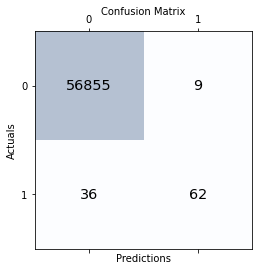

Run completed - Before ROC Curve


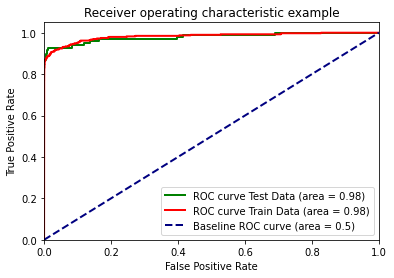

Time Taken by Model: --- 40.01798605918884 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run Logistic Regression 
print("-----------------------")
print("||Logistic Regression||")
print("-----------------------")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


-------------
||KNN Model||
-------------
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 61.1min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 135.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 135.3min finished


Time taken to complete random search:  2:15:18.586812
--------------------------
|      Best Estimator     |
--------------------------

	KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                     weights='distance')

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'weights': 'distance', 'n_neighbors': 13, 'algorithm': 'kd_tree'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total number of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validated scores of best estimator : 

	0.9261572264700303

Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:01.221990


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms

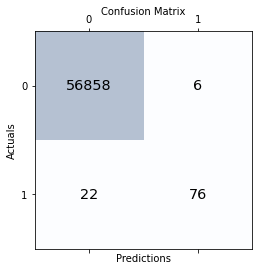

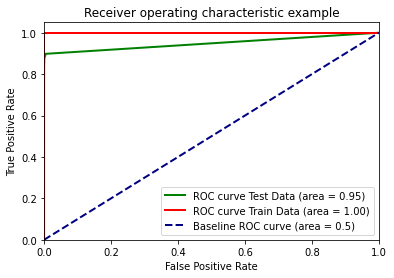

Time Taken by Model: --- 15329.376217126846 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run KNN Model
print("-------------")
print("||KNN Model||")
print("-------------")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

------------------------
||Decision Tree Model||
------------------------
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.7s finished


Time taken to complete random search:  0:00:07.875875
--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=0.5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'min_weight_fraction_leaf': 0.0, 'min_samples_split': 0.5, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_depth': 5, 'criterion': 'entropy'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total number of cross validation sets: 3

---------------------

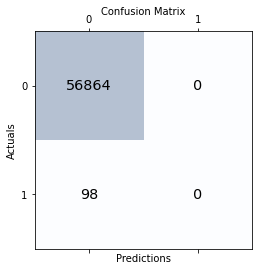

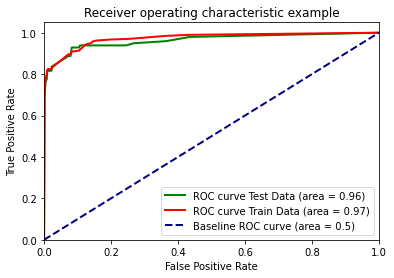

Time Taken by Model: --- 19.307206630706787 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run Decision Tree Model
print("------------------------")
print("||Decision Tree Model||")
print("------------------------")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

-----------------------
||Random Forest Model||
-----------------------
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 19.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 19.9min finished


Time taken to complete random search:  0:39:30.600510
--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features='auto',
                       max_leaf_nodes=100, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=75, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'n_estimators': 1000, 'min_samples_split': 3, 'min_samples_leaf': 75, 'max_leaf_nodes': 100, 'max_features': 'auto', 'max_depth': 8, 'criterion': 'entropy'}

---------------------------------
|   N

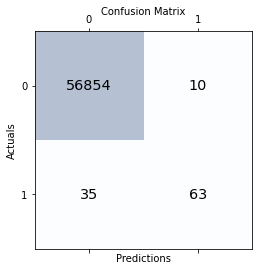

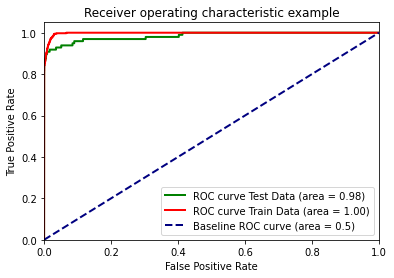

Time Taken by Model: --- 12831.338401794434 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run Random Forest Model
print("-----------------------")
print("||Random Forest Model||")
print("-----------------------")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

-----------------
||XGBoost Model||
-----------------
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 18.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 18.7min finished


Time taken to complete random search:  0:19:29.723491
--------------------------
|      Best Estimator     |
--------------------------

	XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.7,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=1)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'subsample': 0.7, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.7, 'colsample_bytree': 0.7}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total number of cross 

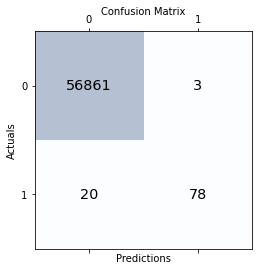

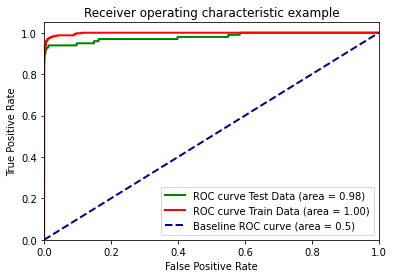

Time Taken by Model: --- 1602.5652322769165 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run XGBoost Model
print("-----------------")
print("||XGBoost Model||")
print("-----------------")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

---------------------------------
||SVM Model with Sigmoid Kernel||
---------------------------------
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.8min finished


Time taken to complete random search:  0:01:53.691262
--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=1333.521432163324, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.013894954943731374, kernel='sigmoid', max_iter=-1,
    probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'gamma': 0.013894954943731374, 'C': 1333.521432163324}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total number of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validated scores of best estimator : 

	0.912645247022434

Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:05.698576


Predi

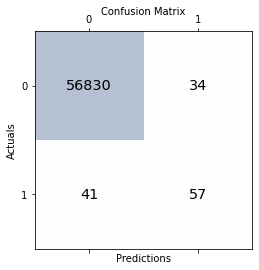

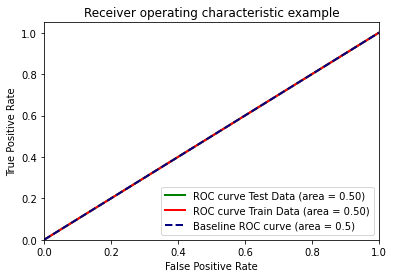

Time Taken by Model: --- 186.42352032661438 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run SVM Model with Sigmoid Kernel
print("---------------------------------")
print("||SVM Model with Sigmoid Kernel||")
print("---------------------------------")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [ ]:
#Display the model performance for Power Transformed dataset
df_Results

,Data_Imbalance_Handiling,Model,Accuracy(%),Recall(%),Precision(%),ROC-AUC
0,Power Transformer,Logistic Regression,99.921000,63.265306,87.323943,0.978858
1,Power Transformer,DecisionTree Classifier,99.827955,0.000000,0.000000,0.962888
2,Power Transformer,RandomForest Classifier,99.921000,64.285714,86.301369,0.984158
3,Power Transformer,XGBoost Classifier,99.959622,79.591837,96.296296,0.979833
4,Power Transformer,KNN Classifier,99.950844,77.551020,92.682926,0.948701
5,Power Transformer,SVM Classifier,99.868333,58.163265,62.637362,0.500000


**We can see that XGBoost Classifier has given best results considering Accuracy , Recall, Precision and ROC-AUC, all 4 parameters.**

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

## Perform cross validation with StratifiedKFold

In [12]:
#Lets perfrom StratifiedKFold and check the results
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=state)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [ 30473  30496  31002 ... 284804 284805 284806] TEST: [    0     1     2 ... 57017 57018 57019]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 81609  82400  83053 ... 170946 170947 170948]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [150654 150660 150661 ... 227866 227867 227868]
TRAIN: [     0      1      2 ... 227866 227867 227868] TEST: [212516 212644 213092 ... 284804 284805 284806]


### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

## Running models again with StratifiedKFold split

-----------------------
||Logistic Regression||
-----------------------
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   17.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   17.1s finished


Time taken to complete random search:  0:00:28.577379
--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=0.13894954943731375, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'penalty': 'l2', 'C': 0.13894954943731375}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total number of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validated scores of best estimator : 

	0.9560585568213164

Training the model...
Training completed... 
 

Training 

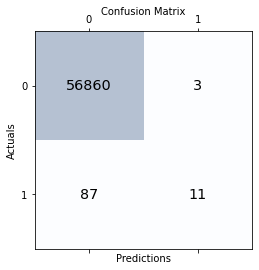

Run completed - Before ROC Curve


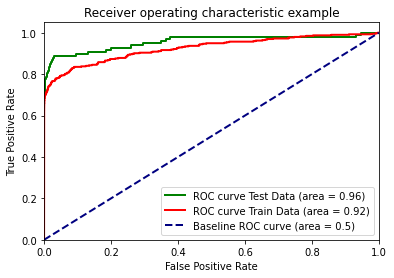

Time Taken by Model: --- 126.9249541759491 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run Logistic Regression 
print("-----------------------")
print("||Logistic Regression||")
print("-----------------------")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"StratifiedKFold split",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

-------------
||KNN Model||
-------------
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 39.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 39.4min finished


Time taken to complete random search:  0:39:23.029329
--------------------------
|      Best Estimator     |
--------------------------

	KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=15, p=2,
                     weights='distance')

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'weights': 'distance', 'n_neighbors': 15, 'algorithm': 'ball_tree'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total number of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validated scores of best estimator : 

	0.8714716763493833

Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:01.136156


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:S

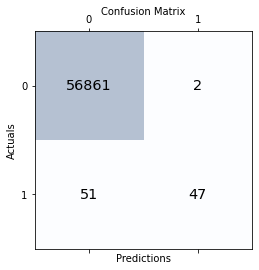

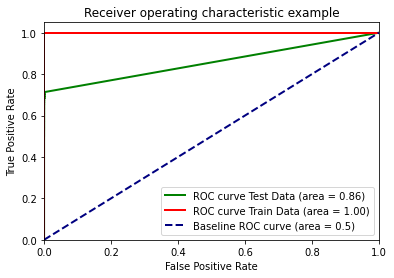

Time Taken by Model: --- 4494.212479829788 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run KNN Model
print("-------------")
print("||KNN Model||")
print("-------------")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"StratifiedKFold split",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

------------------------
||Decision Tree Model||
------------------------
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.5s finished


Time taken to complete random search:  0:00:08.281538
--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=0.5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'min_weight_fraction_leaf': 0.0, 'min_samples_split': 0.5, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 9, 'criterion': 'entropy'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total number of cross validation sets: 3

---------------------

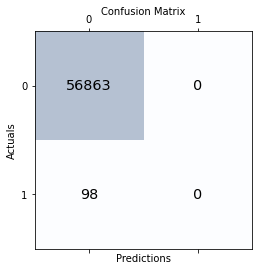

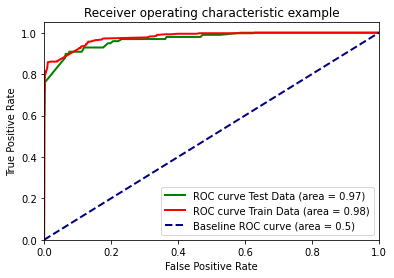

Time Taken by Model: --- 23.041463136672974 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run Decision Tree Model
print("------------------------")
print("||Decision Tree Model||")
print("------------------------")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"StratifiedKFold split",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

-----------------------
||Random Forest Model||
-----------------------
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 24.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 24.6min finished


Time taken to complete random search:  0:26:42.183199
--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=500, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'n_estimators': 80, 'min_samples_split': 2, 'min_samples_leaf': 100, 'max_leaf_nodes': 500, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'entropy'}

---------------------------------
|   N

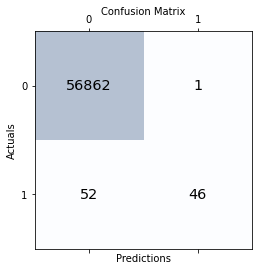

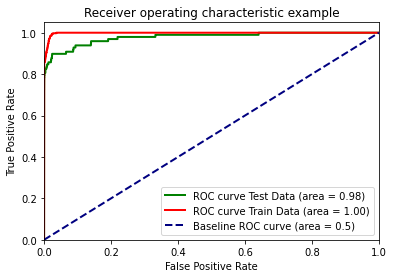

Time Taken by Model: --- 2726.9938690662384 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run Random Forest Model
print("-----------------------")
print("||Random Forest Model||")
print("-----------------------")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"StratifiedKFold split",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

-----------------
||XGBoost Model||
-----------------
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 22.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 22.7min finished


Time taken to complete random search:  0:31:26.462228
--------------------------
|      Best Estimator     |
--------------------------

	XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.25,
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=1)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'subsample': 0.7, 'n_estimators': 1000, 'min_child_weight': 5, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 0.25, 'colsample_bytree': 0.6}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total number of 

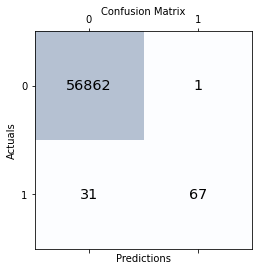

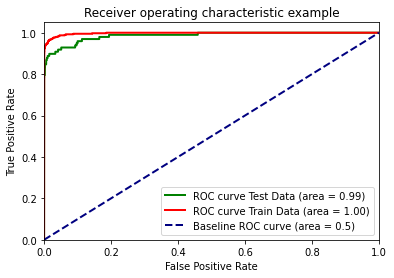

Time Taken by Model: --- 6215.328276157379 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run XGBoost Model
print("-----------------")
print("||XGBoost Model||")
print("-----------------")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"StratifiedKFold split",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

---------------------------------
||SVM Model with Sigmoid Kernel||
---------------------------------
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.8min finished


Time taken to complete random search:  0:02:04.795901
--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=348.0700588428413, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=2.6826957952797246, kernel='sigmoid', max_iter=-1, probability=False,
    random_state=42, shrinking=True, tol=0.001, verbose=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'gamma': 2.6826957952797246, 'C': 348.0700588428413}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total number of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validated scores of best estimator : 

	0.7936950699054637

Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:18.017339


Predicting t

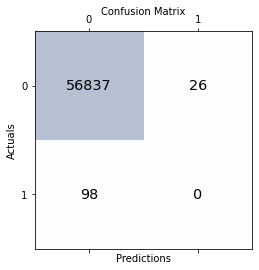

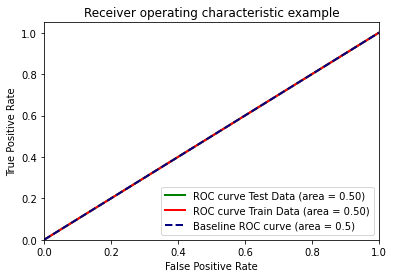

Time Taken by Model: --- 305.4296519756317 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run SVM Model with Sigmoid Kernel
print("---------------------------------")
print("||SVM Model with Sigmoid Kernel||")
print("---------------------------------")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"StratifiedKFold split",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [ ]:
#Display the model performance for StratifiedKFold data
df_Results

,Data_Imbalance_Handiling,Model,Accuracy(%),Recall(%),Precision(%),ROC-AUC
0,StratifiedKFold split,Logistic Regression,99.841997,11.224490,78.571428,0.955619
1,StratifiedKFold split,DecisionTree Classifier,99.827952,0.000000,0.000000,0.969012
2,StratifiedKFold split,XGBoost Classifier,99.943821,68.367347,98.529411,0.985613
3,StratifiedKFold split,SVM Classifier,99.782307,0.000000,0.000000,0.500000
4,StratifiedKFold split,KNN Classifier,99.906954,47.959184,95.918367,0.856363
5,StratifiedKFold split,RandomForest Classifier,99.906954,46.938776,97.872340,0.978246


#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

**Best Results is given by XGBoost Classifier so we will use that model and will use the best parameters given by StratifiedKfold search**

In [ ]:
#Using XGBClassifier with best parameters received during StratifiedK Fold training
clf = XGBClassifier(subsample=0.7,n_estimators=1000,min_child_weight=5,max_depth=6,
                    learning_rate=0.01,gamma=0.25,colsample_bytree=0.6,random_state=state) #initialise the model with optimum hyperparameters
clf.fit(X_train_SKF_cv, y_train_SKF_cv)

#find predicted vallues
y_pred_SKF_xgb = clf.predict(X_test_SKF_cv)


#Find predicted probabilities
y_pred_probs_SKF_xgb = clf.predict_proba(X_test_SKF_cv)[:,1] 


# Accuracy of the model
Accuracy_SKF_xgb = metrics.accuracy_score(y_true=y_test_SKF_cv, y_pred=y_pred_SKF_xgb)
print("XGB Classifier Accuracy: {0}".format(Accuracy_SKF_xgb))

# Recall of the model
xgb_SKF_recall = metrics.recall_score(y_true=y_test_SKF_cv, y_pred=y_pred_SKF_xgb)
print("XGB Classifier Recall: {0}" .format(xgb_SKF_recall))

# F1 Score of the model
xgb_SKF_f1score = metrics.f1_score(y_true=y_test_SKF_cv, y_pred=y_pred_SKF_xgb)
print("XGB Classifier F1 Score: {0}" .format(xgb_SKF_f1score))

# Precision of the model
xgb_SKF_precision = metrics.precision_score(y_true=y_test_SKF_cv, y_pred=y_pred_SKF_xgb)
print("XGB Classifier Precision: {0}" .format(xgb_SKF_precision))


from sklearn.metrics import roc_auc_score

xgb_SKF_roc_value = roc_auc_score(y_test_SKF_cv, y_pred_probs_SKF_xgb)
print("XGB Classifier roc_value: {0}" .format(xgb_SKF_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test_SKF_cv, y_pred_probs_SKF_xgb)
threshold_SKF = thresholds[np.argmax(tpr-fpr)]
print("XGB Classifier threshold: {0}".format(threshold_SKF))

XGB Classifier Accuracy: 0.9994382121100402
XGB Classifier Recall: 0.7040816326530612
XGB Classifier F1 Score: 0.8117647058823529
XGB Classifier Precision: 0.9583333333333334
XGB Classifier roc_value: 0.9860041338167963
XGB Classifier threshold: 0.001570632797665894


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 12
3rd Top var = 14


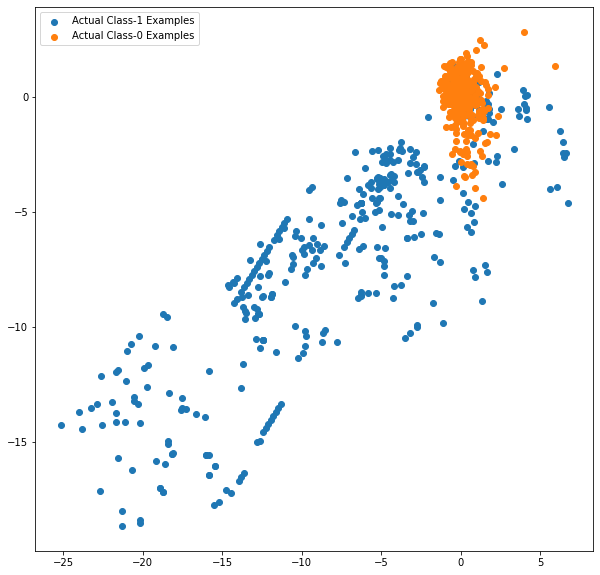

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train_SKF_cv.to_numpy()[np.where(y_train_SKF_cv==1.0)]
X_train_0 = X_train_SKF_cv.to_numpy()[np.where(y_train_SKF_cv==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling

In [ ]:
#Get information about the class labels BEFORE applying Random Oversampling
print("Before oversampling, number of fraud transactions: ",y_train.value_counts()[1])
print("Before oversampling, number of non fraud transactions: ",y_train.value_counts()[0])

Before oversampling, number of fraud transactions:  394
Before oversampling, number of non fraud transactions:  227451


In [ ]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    
    ROS = RandomOverSampler(random_state=state)
    X_oversample, y_oversample= ROS.fit_resample(X_train, y_train)
  
 #Create Dataframe for X_oversample and y_oversample
X_oversample = pd.DataFrame(data=X_oversample,   columns=col_names)
y_oversample = pd.DataFrame(data=y_oversample) #required as we are passing y_train.values in model_report function


In [ ]:
#Get information about the class labels AFTER applying Random Oversampling
print("After Random oversampling, number of fraud transactions: ",y_oversample.value_counts()[1])
print("After Random oversampling, number of non fraud transactions: ",y_oversample.value_counts()[0])

After Random oversampling, number of fraud transactions:  227452
After Random oversampling, number of non fraud transactions:  227452


-----------------------
||Logistic Regression||
-----------------------
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   24.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   24.1s finished


Time taken to complete random search:  0:00:52.869941
--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=71.96856730011514, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'penalty': 'l2', 'C': 71.96856730011514}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total number of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validated scores of best estimator : 

	0.9812796562489728

Training the model...
Training completed... 
 

Training Time

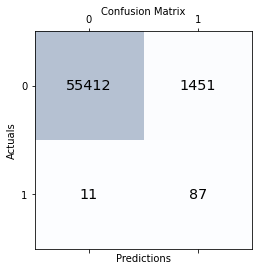

Run completed - Before ROC Curve


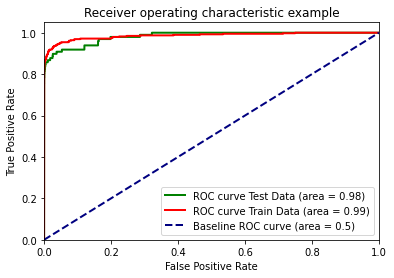

Time Taken by Model: --- 306.16264367103577 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run Logistic Regression 
print("-----------------------")
print("||Logistic Regression||")
print("-----------------------")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"Random Oversampling with StratifiedKFold CV",X_oversample,y_oversample, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

-------------
||KNN Model||
-------------
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 116.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 116.5min finished


Time taken to complete random search:  1:56:32.135654
--------------------------
|      Best Estimator     |
--------------------------

	KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                     weights='distance')

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'weights': 'distance', 'n_neighbors': 13, 'algorithm': 'brute'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total number of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validated scores of best estimator : 

	0.9994746149556807

Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:00.039506


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) --

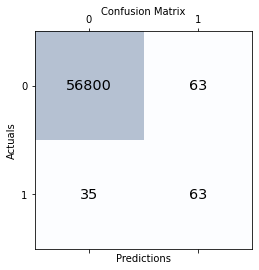

KeyboardInterrupt: ignored

In [ ]:
#Run KNN Model 
#We will not run the 'plot_roc_curve' function for this model as it took 11+ hours to run. 
print("-------------")
print("||KNN Model||")
print("-------------")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"Random Oversampling with StratifiedKFold CV",X_oversample,y_oversample, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

------------------------
||Decision Tree Model||
------------------------
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.1s finished


Time taken to complete random search:  0:00:08.636428
--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5,
                       min_samples_split=0.30000000000000004,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'min_weight_fraction_leaf': 0.0, 'min_samples_split': 0.30000000000000004, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 6, 'criterion': 'gini'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total number o

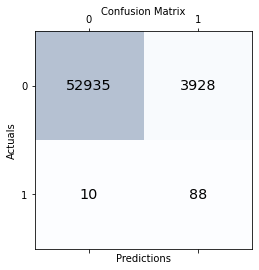

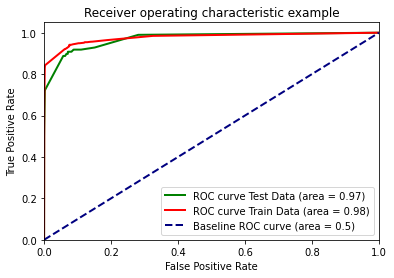

Time Taken by Model: --- 25.879912614822388 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run Decision Tree Model
print("------------------------")
print("||Decision Tree Model||")
print("------------------------")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"Random Oversampling with StratifiedKFold CV",X_oversample,y_oversample, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

-----------------------
||Random Forest Model||
-----------------------
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 26.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 26.5min finished


Time taken to complete random search:  0:28:35.892879
--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=500, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'n_estimators': 80, 'min_samples_split': 2, 'min_samples_leaf': 100, 'max_leaf_nodes': 500, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'entropy'}

---------------------------------
|   N

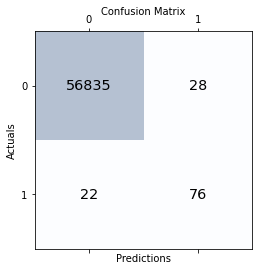

Time Taken by Model: --- 2319.8816792964935 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run Random Forest Model (We will not run the 'plot_roc_curve' function for this model as it took hours to run, we are storing all the results though)
print("-----------------------")
print("||Random Forest Model||")
print("-----------------------")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"Random Oversampling with StratifiedKFold CV",X_oversample,y_oversample, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

-----------------
||XGBoost Model||
-----------------
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 31.2min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 58.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 58.8min finished


Time taken to complete random search:  1:00:47.060922
--------------------------
|      Best Estimator     |
--------------------------

	XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=15,
              min_child_weight=9, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=1)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'subsample': 0.7, 'n_estimators': 50, 'min_child_weight': 9, 'max_depth': 15, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.8}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total number of cross va

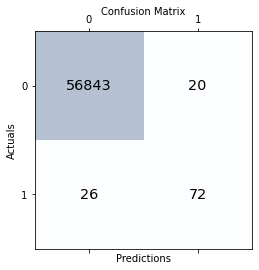

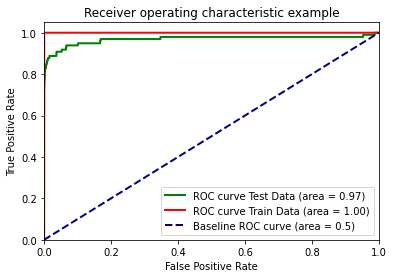

Time Taken by Model: --- 4698.606645107269 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run XGBoost Model
print("-----------------")
print("||XGBoost Model||")
print("-----------------")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"Random Oversampling with StratifiedKFold CV",X_oversample,y_oversample, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [ ]:
#Run SVM Model with Sigmoid Kernel
print("---------------------------------")
print("||SVM Model with Sigmoid Kernel||")
print("---------------------------------")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"Random Oversampling with StratifiedKFold CV",X_oversample,y_oversample, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

---------------------------------
||SVM Model with Sigmoid Kernel||
---------------------------------
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: ignored

**Above code for SVM model training is correct but couldn't train the model as it was computationally very expensive. Ran the RandomisedSearchCV on oversampled data, the code was running for 9+ hours and was still not complete so had to interrupt the training**

**All other models are trained on Random OverSampled data and results are shown below**

In [ ]:
#Display the various model performances for RANDOM Oversampling StratifiedKFold split data
df_Results

,Data_Imbalance_Handiling,Model,Accuracy(%),Recall(%),Precision(%),ROC-AUC
0,Random Oversampling with StratifiedKFold CV,Logistic Regression,97.433332,88.775510,5.656697,0.982402
1,Random Oversampling with StratifiedKFold CV,DecisionTree Classifier,93.086498,89.795918,2.191235,0.971343
2,Random Oversampling with StratifiedKFold CV,RandomForest Classifier,99.912221,77.551020,73.076923,0.984643
3,Random Oversampling with StratifiedKFold CV,XGBoost Classifier,99.919243,73.469388,78.260869,0.968821
4,Random Oversampling with StratifiedKFold CV,KNN Classifier,99.827952,64.285714,50.000000,0.856342


**We can see that `RandomForest Classifier` has given best ROC_AUC score, followed by `XGBoost Classifier`.**

### Print the class distribution after applying SMOTE (on StratifiedKFold dist.)

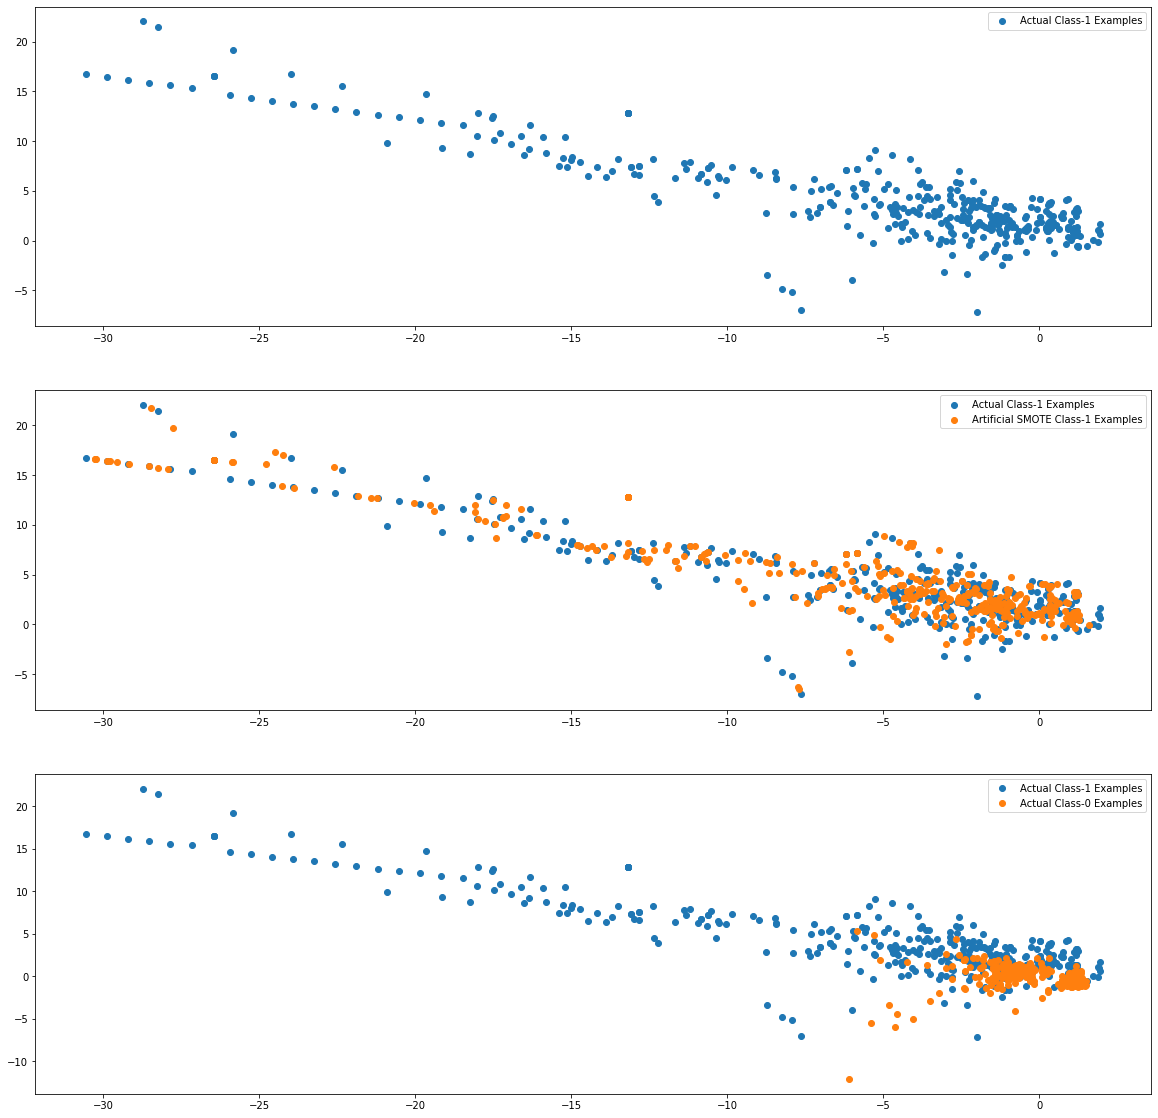

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling
sm = over_sampling.SMOTE(random_state=state)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#Get information about the class labels BEFORE applying Random Oversampling
print("Before using SMOTE, number of fraud transactions: ",y_train.value_counts()[1])
print("Before using SMOTE, number of non fraud transactions: ",y_train.value_counts()[0])

Before using SMOTE, number of fraud transactions:  394
Before using SMOTE, number of non fraud transactions:  227451


In [ ]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_Smote, y_train_Smote= SMOTE.fit_resample(X_train, y_train)
  

    #Create Dataframe for X_oversample and y_oversample
X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=col_names)
y_train_Smote = pd.DataFrame(data=y_train_Smote) #required as we are passing y_train.values in model_report function


In [ ]:
#Get information about the class labels AFTER applying Random Oversampling
print("After using SMOTE, number of fraud transactions: ",y_train_Smote.value_counts()[1])
print("After using SMOTE, number of non fraud transactions: ",y_train_Smote.value_counts()[0])

After using SMOTE, number of fraud transactions:  227452
After using SMOTE, number of non fraud transactions:  227452


##### Build models on other algorithms to see the better performing on SMOTE

-----------------------
||Logistic Regression||
-----------------------
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   31.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   31.9s finished


Time taken to complete random search:  0:01:00.386342
--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=71.96856730011514, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'penalty': 'l2', 'C': 71.96856730011514}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total number of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validated scores of best estimator : 

	0.989221705298411

Training the model...
Training completed... 
 

Training Time 

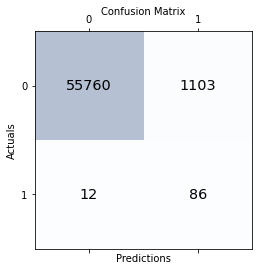

Run completed - Before ROC Curve


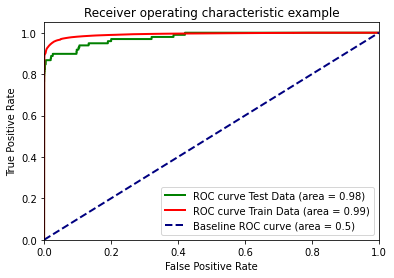

Time Taken by Model: --- 276.66247630119324 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run Logistic Regression 
print("-----------------------")
print("||Logistic Regression||")
print("-----------------------")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"SMOTE Oversampling with StratifiedKFold CV",X_train_Smote,y_train_Smote, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

-------------
||KNN Model||
-------------
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 136.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 136.7min finished


Time taken to complete random search:  2:16:41.959911
--------------------------
|      Best Estimator     |
--------------------------

	KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=15, p=2,
                     weights='distance')

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'weights': 'distance', 'n_neighbors': 15, 'algorithm': 'ball_tree'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total number of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validated scores of best estimator : 

	0.9988698763385866

Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:02.725283


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:S

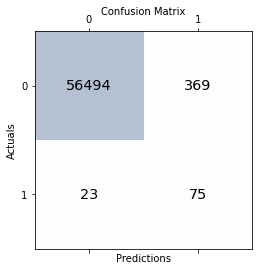

Time Taken by Model: --- 9143.687594175339 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run KNN Model 
#We will not run the 'plot_roc_curve' function for this model as it took 11+ hours to run for RandomOversample and was still not completed. 
print("-------------")
print("||KNN Model||")
print("-------------")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"SMOTE Oversampling with StratifiedKFold CV",X_train_Smote,y_train_Smote, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

------------------------
||Decision Tree Model||
------------------------
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    8.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    8.5s finished


Time taken to complete random search:  0:00:11.401244
--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.1,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'min_weight_fraction_leaf': 0.0, 'min_samples_split': 0.1, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 5, 'criterion': 'entropy'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total number of cross validation sets: 3

---------------------

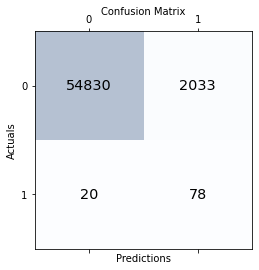

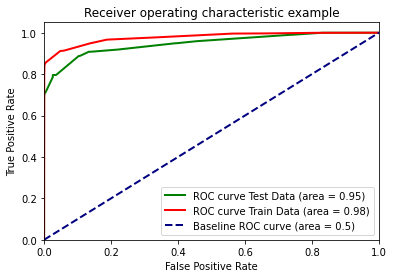

Time Taken by Model: --- 40.260523557662964 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run Decision Tree Model
print("------------------------")
print("||Decision Tree Model||")
print("------------------------")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"SMOTE Oversampling with StratifiedKFold CV",X_train_Smote,y_train_Smote, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

-----------------------
||Random Forest Model||
-----------------------
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 45.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 45.4min finished


Time taken to complete random search:  0:49:11.469796
--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=500, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'n_estimators': 80, 'min_samples_split': 2, 'min_samples_leaf': 100, 'max_leaf_nodes': 500, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'entropy'}

---------------------------------
|   N

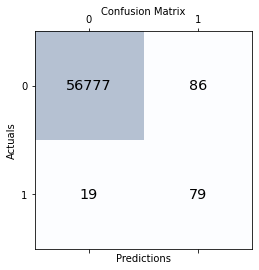

Time Taken by Model: --- 4083.5906958580017 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run Random Forest Model (We will not run the 'plot_roc_curve' function for this model as it took hours to run, we are storing all the results though)
print("-----------------------")
print("||Random Forest Model||")
print("-----------------------")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"SMOTE Oversampling with StratifiedKFold CV",X_train_Smote,y_train_Smote, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

-----------------
||XGBoost Model||
-----------------
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 57.9min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 100.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 100.4min finished


Time taken to complete random search:  2:38:24.935676
--------------------------
|      Best Estimator     |
--------------------------

	XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1,
              learning_rate=0.01, max_delta_step=0, max_depth=17,
              min_child_weight=9, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'subsample': 0.8, 'n_estimators': 1000, 'min_child_weight': 9, 'max_depth': 17, 'learning_rate': 0.01, 'gamma': 1, 'colsample_bytree': 0.8}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total number of cros

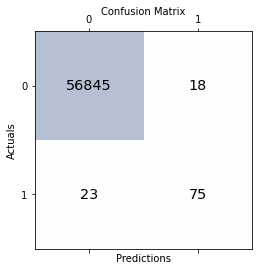

KeyboardInterrupt: ignored

In [ ]:
#Run XGBoost Model
print("-----------------")
print("||XGBoost Model||")
print("-----------------")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"SMOTE Oversampling with StratifiedKFold CV",X_train_Smote,y_train_Smote, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

**Above execution is interrupted as the model took 7+ hours to produce this results i.e. 'model_report'. Next function was 'plot_ruc_score' which could have taken another 6-7 hours. So we are skipping ROC plotting here as we received all the necessary results**

In [ ]:
#Run SVM Model with Sigmoid Kernel
print("---------------------------------")
print("||SVM Model with Sigmoid Kernel||")
print("---------------------------------")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"SMOTE Oversampling with StratifiedKFold CV",X_train_Smote,y_train_Smote, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

**Above code for SVM model training is correct but couldn't train the model as it was computationally very expensive. Ran the RandomisedSearchCV on oversampled data, the code was running for 9+ hours and was still not complete**

In [ ]:
#Display the various model performances for SMOTE Oversampling StratifiedKFold split data
df_Results

,Data_Imbalance_Handiling,Model,Accuracy(%),Recall(%),Precision(%),ROC-AUC
0,SMOTE Oversampling with StratifiedKFold CV,Logistic Regression,98.042520,87.755102,7.232968,0.978116
1,SMOTE Oversampling with StratifiedKFold CV,DecisionTree Classifier,96.395780,79.591837,3.694931,0.947969
2,SMOTE Oversampling with StratifiedKFold CV,RandomForest Classifier,99.815663,80.612245,47.878787,0.982156
3,SMOTE Oversampling with StratifiedKFold CV,XGBoost Classifier,99.928020,76.530612,80.645161,0.980966
4,SMOTE Oversampling with StratifiedKFold CV,KNN Classifier,99.311810,76.530612,16.891891,0.905416


**We can see that `XGBoost Classifier` is the best performing model here.**	

### Print the class distribution after applying ADASYN

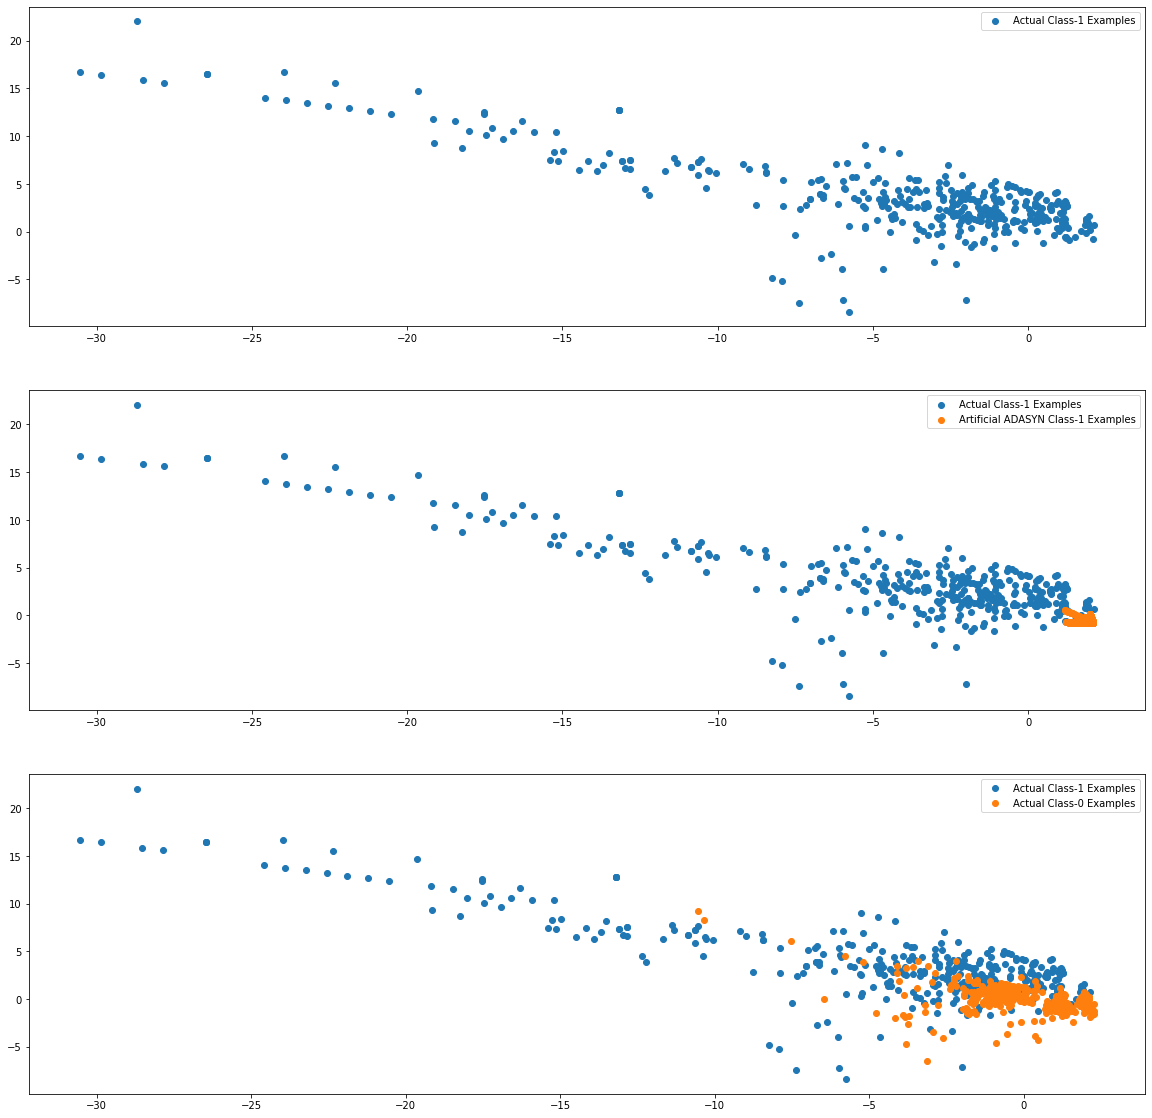

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [13]:
#Get information about the class labels BEFORE applying Random Oversampling
print("Before using ADASYN, number of fraud transactions: ",y_train.value_counts()[1])
print("Before using ADASYN, number of non fraud transactions: ",y_train.value_counts()[0])

Before using ADASYN, number of fraud transactions:  394
Before using ADASYN, number of non fraud transactions:  227451


In [14]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    ADASYN = over_sampling.ADASYN(random_state=state)
    X_train_ADASYN, y_train_ADASYN= ADASYN.fit_resample(X_train, y_train)
  
 #Create Dataframe for X_over
X_train_ADASYN = pd.DataFrame(data=X_train_ADASYN,   columns=col_names)
y_train_ADASYN = pd.DataFrame(data=y_train_ADASYN) #required as we are passing y_train.values in model_report function


In [15]:
#Get information about the class labels AFTER applying Random Oversampling
print("After using ADASYN, number of fraud transactions: ",y_train_ADASYN.value_counts()[1])
print("After using ADASYN, number of non fraud transactions: ",y_train_ADASYN.value_counts()[0])

After using ADASYN, number of fraud transactions:  1    227459
dtype: int64
After using ADASYN, number of non fraud transactions:  0    227452
dtype: int64


##### Build models on other algorithms to see the better performing on ADASYN

-----------------------
||Logistic Regression||
-----------------------
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   32.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   32.6s finished


Time taken to complete random search:  0:01:02.534857
--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=0.13894954943731375, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'penalty': 'l2', 'C': 0.13894954943731375}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total number of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validated scores of best estimator : 

	0.9637533697982162

Training the model...
Training completed... 
 

Training 

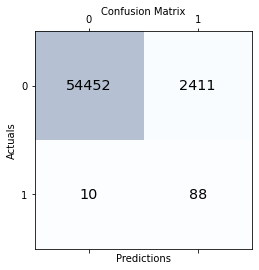

Run completed - Before ROC Curve


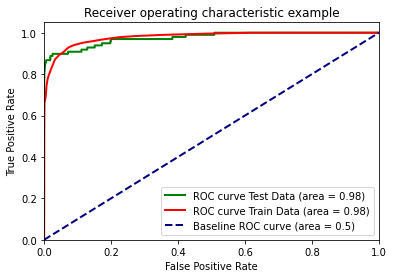

Time Taken by Model: --- 277.14299607276917 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run Logistic Regression 
print("-----------------------")
print("||Logistic Regression||")
print("-----------------------")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"ADASYN Oversampling with StratifiedKFold CV",X_train_ADASYN,y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

-------------
||KNN Model||
-------------
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 139.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 139.4min finished


Time taken to complete random search:  2:19:27.167333
--------------------------
|      Best Estimator     |
--------------------------

	KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=15, p=2,
                     weights='distance')

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'weights': 'distance', 'n_neighbors': 15, 'algorithm': 'ball_tree'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total number of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validated scores of best estimator : 

	0.981471509465548

Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:02.305121


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS

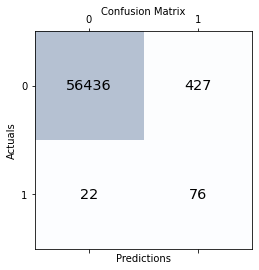

Time Taken by Model: --- 9284.68627667427 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run KNN Model 
#We will not run the 'plot_roc_curve' function for this model as it took 11+ hours to run for RandomOversample and was still not completed. 
print("-------------")
print("||KNN Model||")
print("-------------")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"ADASYN Oversampling with StratifiedKFold CV",X_train_ADASYN,y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

------------------------
||Decision Tree Model||
------------------------
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    8.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    8.6s finished


Time taken to complete random search:  0:00:11.687160
--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.1,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'min_weight_fraction_leaf': 0.0, 'min_samples_split': 0.1, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 5, 'criterion': 'entropy'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total number of cross validation sets: 3

---------------------

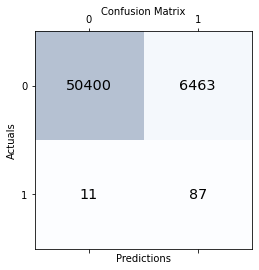

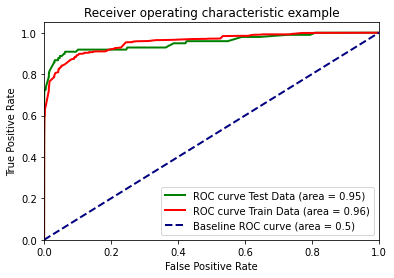

Time Taken by Model: --- 40.89345955848694 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run Decision Tree Model
print("------------------------")
print("||Decision Tree Model||")
print("------------------------")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"ADASYN Oversampling with StratifiedKFold CV",X_train_ADASYN,y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

-----------------------
||Random Forest Model||
-----------------------
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 48.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 48.2min finished


Time taken to complete random search:  0:52:19.496990
--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=500, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'n_estimators': 80, 'min_samples_split': 2, 'min_samples_leaf': 100, 'max_leaf_nodes': 500, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'entropy'}

---------------------------------
|   N

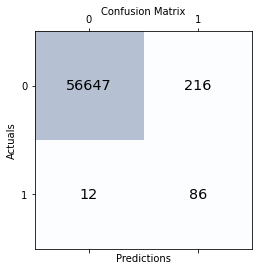

Time Taken by Model: --- 4367.661349058151 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run Random Forest Model (We will not run the 'plot_roc_curve' function for this model as it took hours to run, we are storing all the results though)
print("-----------------------")
print("||Random Forest Model||")
print("-----------------------")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"ADASYN Oversampling with StratifiedKFold CV",X_train_ADASYN,y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

-----------------
||XGBoost Model||
-----------------
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 60.9min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 106.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 106.1min finished


Time taken to complete random search:  2:48:01.213710
--------------------------
|      Best Estimator     |
--------------------------

	XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1,
              learning_rate=0.01, max_delta_step=0, max_depth=17,
              min_child_weight=9, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'subsample': 0.8, 'n_estimators': 1000, 'min_child_weight': 9, 'max_depth': 17, 'learning_rate': 0.01, 'gamma': 1, 'colsample_bytree': 0.8}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total number of cros

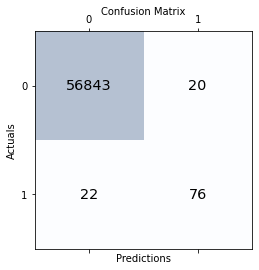

Time Taken by Model: --- 28048.026085853577 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run XGBoost Model
print("-----------------")
print("||XGBoost Model||")
print("-----------------")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"ADASYN Oversampling with StratifiedKFold CV",X_train_ADASYN,y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [ ]:
#Run SVM Model with Sigmoid Kernel
print("---------------------------------")
print("||SVM Model with Sigmoid Kernel||")
print("---------------------------------")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"ADASYN Oversampling with StratifiedKFold CV",X_train_ADASYN,y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

**Above code for SVM model training is correct but couldn't train the model as it was computationally very expensive. Ran the RandomisedSearchCV on oversampled data, the code was running for 9+ hours and was still not complete**

In [ ]:
#Display the various model performances for ADASYN Oversampling StratifiedKFold split data
df_Results

,Data_Imbalance_Handiling,Model,Accuracy(%),Recall(%),Precision(%),ROC-AUC
0,ADASYN Oversampling with StratifiedKFold CV,Logistic Regression,95.749723,89.795918,3.521409,0.975177
1,ADASYN Oversampling with StratifiedKFold CV,DecisionTree Classifier,88.634329,88.775510,1.328244,0.953278
2,ADASYN Oversampling with StratifiedKFold CV,RandomForest Classifier,99.599726,87.755102,28.476821,0.980451
3,ADASYN Oversampling with StratifiedKFold CV,XGBoost Classifier,99.926265,77.551020,79.166667,0.983746
4,ADASYN Oversampling with StratifiedKFold CV,KNN Classifier,88.634328,88.775510,1.328244,0.953277


### Creating a Dataframe to store all the Oversampled training results

In [ ]:
results_oversample = [('Random Oversampling with StratifiedKFold CV','Logistic Regression',97.433332,88.775510,5.656697,0.982402), 
           ('Random Oversampling with StratifiedKFold CV','DecisionTree Classifier',93.086498,89.795918,2.191235,0.971343),
           ('Random Oversampling with StratifiedKFold CV','RandomForest Classifier',99.912221,77.551020,73.076923,0.984643),
           ('Random Oversampling with StratifiedKFold CV','XGBoost Classifier',99.919243,73.469388,78.260869,0.968821),
           ('Random Oversampling with StratifiedKFold CV','KNN Classifier',99.827952,64.285714,50.000000,0.856342),
           ('SMOTE Oversampling with StratifiedKFold CV','Logistic Regression',98.042520,87.755102,7.232968,0.978116), 
           ('SMOTE Oversampling with StratifiedKFold CV','DecisionTree Classifier',96.395780,79.591837,3.694931,0.947969),
           ('SMOTE Oversampling with StratifiedKFold CV','RandomForest Classifier',99.815663,80.612245,47.878787,0.982156),
           ('SMOTE Oversampling with StratifiedKFold CV','XGBoost Classifier',99.928020,76.530612,80.645161,0.980966),
           ('SMOTE Oversampling with StratifiedKFold CV','KNN Classifier',99.311810,76.530612,16.891891,0.905416),
           ('ADASYN Oversampling with StratifiedKFold CV','Logistic Regression',95.749723,89.795918,3.521409,0.975177), 
           ('ADASYN Oversampling with StratifiedKFold CV','DecisionTree Classifier',88.634329,88.775510,1.328244,0.953278),
           ('ADASYN Oversampling with StratifiedKFold CV','RandomForest Classifier',99.599726,87.755102,28.476821,0.980451),
           ('ADASYN Oversampling with StratifiedKFold CV','XGBoost Classifier',99.926265,77.55102,79.166667,0.983746),
           ('ADASYN Oversampling with StratifiedKFold CV','KNN Classifier',88.634328,88.775510,1.328244,0.953277)]

In [ ]:
df_FinalResults = pd.DataFrame(results_oversample,columns=['Data_Imbalance_Handiling','Model','Accuracy(%)','Recall(%)','Precision(%)','ROC-AUC'])

df_FinalResults

,Data_Imbalance_Handiling,Model,Accuracy(%),Recall(%),Precision(%),ROC-AUC
0,Random Oversampling with StratifiedKFold CV,Logistic Regression,97.433332,88.775510,5.656697,0.982402
1,Random Oversampling with StratifiedKFold CV,DecisionTree Classifier,93.086498,89.795918,2.191235,0.971343
2,Random Oversampling with StratifiedKFold CV,RandomForest Classifier,99.912221,77.551020,73.076923,0.984643
3,Random Oversampling with StratifiedKFold CV,XGBoost Classifier,99.919243,73.469388,78.260869,0.968821
4,Random Oversampling with StratifiedKFold CV,KNN Classifier,99.827952,64.285714,50.000000,0.856342
5,SMOTE Oversampling with StratifiedKFold CV,Logistic Regression,98.042520,87.755102,7.232968,0.978116
6,SMOTE Oversampling with StratifiedKFold CV,DecisionTree Classifier,96.395780,79.591837,3.694931,0.947969
7,SMOTE Oversampling with StratifiedKFold CV,RandomForest Classifier,99.815663,80.612245,47.878787,0.982156
8,SMOTE Oversampling with StratifiedKFold CV,XGBoost Classifier,99.928020,76.530612,80.645161,0.980966
9,SMOTE Oversampling with StratifiedKFold CV,KNN Classifier,99.311810,76.530612,16.891891,0.905416


#### Among all the models - `XGBoost Classifier`, built on Stratified Split and ADASYN oversampling method, has best combination of ROC-AUC, RECALL, PRECISION AND ACCURACY scores. So we will use this to build our final model.

Not able to run `SVM Classifier` for Oversampled data as it was computationally very expensive. Tried running and it took 12+ hours and was still running. The code written is correct and SVM ran successfully for PowerTransformed data and Stratified KFold Split, based on the performance SVM has shown , it will be safe to assume that it will be not be final/best model we will choose.

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
# perform the best oversampling method on X_train & y_train
# Best parameters taken from ADASYN model
clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1,
              learning_rate=0.01, max_delta_step=0, max_depth=17,
              min_child_weight=9, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

clf.fit(X_train_ADASYN, y_train_ADASYN ) # fit on the balanced dataset
XGB_test_score = clf.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Predict Probabilities for each class`
XGB_probs = clf.predict_proba(X_test)[:, 1]


Model Accuracy: 0.9992626533944278


### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 10
3rd Top var = 4


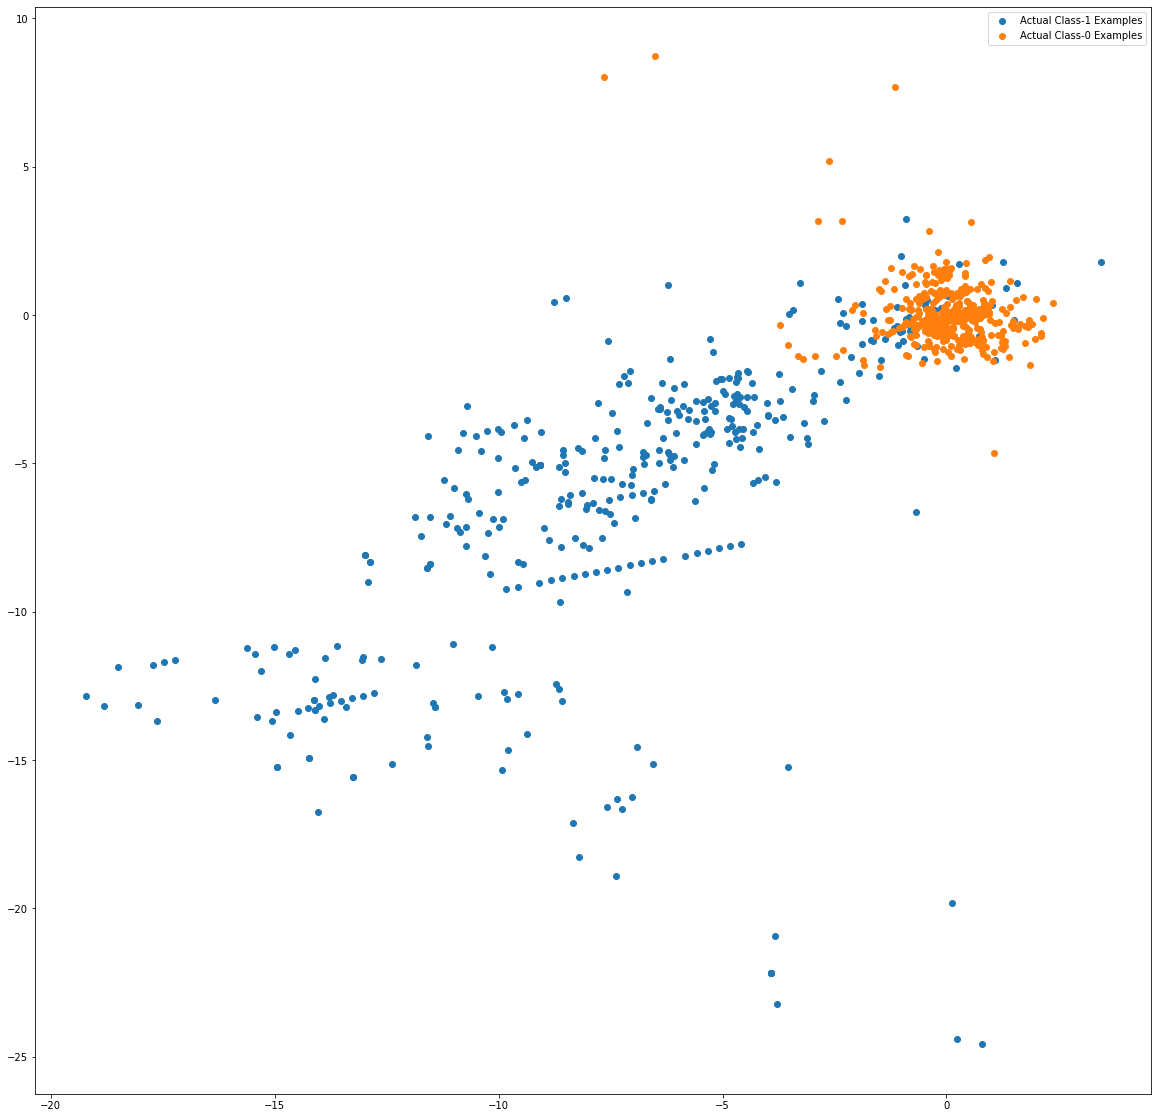

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)
print('Train AUC =', XGB_roc_value)
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold: {0}".format(threshold))
print("FPR: {0}".format(fpr))
print("TPR: {0}".format(tpr))

Train AUC = 0.9842374457476922
Threshold: 0.010442321188747883
FPR: [0.         0.         0.         ... 0.99956035 0.99963069 1.        ]
TPR: [0.         0.01020408 0.29591837 ... 1.         1.         1.        ]


## Model Selection:

### Overall conclusion after running models on ADASYN Oversampled data:

Looking at above results it seems **`XGBOOST`** model with ADASYN Oversampling and StratifiedKFold Split has provided best result.

**Model Accuracy:** 0.9992626533944278

**XGboost roc_value:** 0.9842374457476922

**XGBoost threshold:** 0.010442321188747883

### Additional MODEL - `Neural Networks` on Stratified Split of original data

In [13]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.metrics import binary_crossentropy
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

In [14]:
import warnings
warnings.filterwarnings("ignore")

#Initializing parameters
epochs = 50
batch_size = 32
first_layer_input = X_train_SKF_cv.shape[1]

#Defining the neural network architecture
model = Sequential()
model.add(Dense(32, input_shape=(first_layer_input, ), activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                960       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________


In [15]:
#Define optimzers & Callback for training the neural network
opt=optimizers.Adam(lr=0.001)
callback = ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=2,verbose=1, mode='min', epsilon=0.0001, cooldown=0, min_lr=0.00001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
#Start training the neural network
history = model.fit(X_train_SKF_cv, y_train_SKF_cv,validation_data = (X_test_SKF_cv,y_test_SKF_cv), epochs=epochs, batch_size=batch_size, shuffle=True, verbose=1, callbacks=callback)


Epoch 1/50
7121/7121 [==============================] - 28s 4ms/step - loss: 0.1142 - accuracy: 0.9952 - val_loss: 0.0066 - val_accuracy: 0.9995
Epoch 2/50
7121/7121 [==============================] - 16s 2ms/step - loss: 0.0136 - accuracy: 0.9991 - val_loss: 0.0071 - val_accuracy: 0.9994
Epoch 3/50
7121/7121 [==============================] - 16s 2ms/step - loss: 0.0127 - accuracy: 0.9992 - val_loss: 0.0051 - val_accuracy: 0.9995
Epoch 4/50
7121/7121 [==============================] - 16s 2ms/step - loss: 0.0081 - accuracy: 0.9993 - val_loss: 0.0069 - val_accuracy: 0.9995
Epoch 5/50
7121/7121 [==============================] - 16s 2ms/step - loss: 0.0055 - accuracy: 0.9994 - val_loss: 0.0044 - val_accuracy: 0.9994
Epoch 6/50
7121/7121 [==============================] - 16s 2ms/step - loss: 0.0052 - accuracy: 0.9993 - val_loss: 0.0042 - val_accuracy: 0.9994
Epoch 7/50
7121/7121 [==============================] - 16s 2ms/step - loss: 0.0038 - accuracy: 0.9994 - val_loss: 0.0045 - val_ac

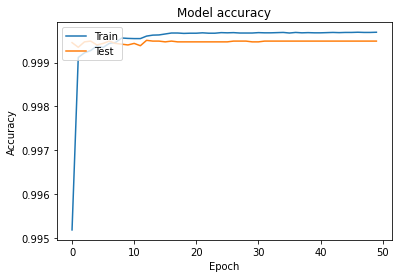

In [17]:
#Plotting Model Accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Train accuracy has increased gradually BUT Test accuracy has flacuated a lot, not a smooth curve,

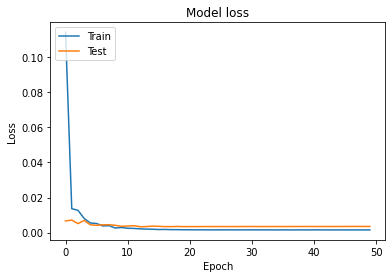

In [18]:
#Plotting Model Loss curve
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

**Neural Network has shown good train and test accuracy on Stratified data.** <br>
**After 20th Epoch, the curve of Accuracy and Loss seems flat**